In [52]:
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import structlog

In [11]:
log = structlog.get_logger()

# 数据读取

In [3]:
data: DataFrame = pd.read_csv('../data/train.csv', index_col=0)
data.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0


# 数据预处理

## 丢弃“无用”列

In [15]:
def drop_columns(df: DataFrame, columns: List[str]) -> None:
    for column in columns:
        if column in df.columns:
            df.drop(column, axis=1, inplace=True)
            log.msg('remove column', colomn=column)
            
drop_columns(data, ['Surname', 'CustomerId'])
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
2,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
3,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
4,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
9,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0


## 数据修正

### Geography 列

只有一个 NaN，因此选择直接丢弃 NaN 行

In [18]:
data['Geography'].value_counts(dropna=False)

Geography
France     4497
Spain      2253
Germany    2249
NaN           1
Name: count, dtype: int64

In [20]:
data.dropna(subset=['Geography'], inplace=True)
data['Geography'].value_counts(dropna=False)

Geography
France     4497
Spain      2253
Germany    2249
Name: count, dtype: int64

### Age 列

只有一个 NaN，因此选择直接丢弃 NaN 行

In [22]:
data['Age'].value_counts(dropna=False)

Age
37.00    437
38.00    434
35.00    425
36.00    405
34.00    404
        ... 
85.00      1
32.34      1
NaN        1
36.44      1
45.25      1
Name: count, Length: 73, dtype: int64

In [23]:
data.dropna(subset=['Age'], inplace=True)
data['Age'].value_counts(dropna=False)

Age
37.00    437
38.00    434
35.00    425
36.00    405
34.00    404
        ... 
88.00      1
85.00      1
32.34      1
36.44      1
82.00      1
Name: count, Length: 72, dtype: int64

### HasCrCard 列

只有一个 NaN，因此选择直接丢弃 NaN 行

In [26]:
data['HasCrCard'].value_counts(dropna=False)

HasCrCard
1.0    6318
0.0    2679
NaN       1
Name: count, dtype: int64

In [27]:
data.dropna(subset=['HasCrCard'], inplace=True)
data['HasCrCard'].value_counts(dropna=False)

HasCrCard
1.0    6318
0.0    2679
Name: count, dtype: int64

### IsActiveMember 列

只有一个 NaN，因此选择直接丢弃 NaN 行

In [28]:
data['IsActiveMember'].value_counts(dropna=False)

IsActiveMember
1.0    4618
0.0    4378
NaN       1
Name: count, dtype: int64

In [29]:
data.dropna(subset=['IsActiveMember'], inplace=True)
data['IsActiveMember'].value_counts(dropna=False)

IsActiveMember
1.0    4618
0.0    4378
Name: count, dtype: int64

## 数据标准化

In [34]:
data.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42.00,2,0.00,1,1.0,1.0,101348.88,1
2,608,Spain,Female,41.00,1,83807.86,1,0.0,1.0,112542.58,0
3,502,France,Female,42.00,8,159660.80,3,1.0,0.0,113931.57,1
4,699,France,Female,39.00,1,0.00,2,0.0,0.0,93826.63,0
6,645,Spain,Male,44.00,8,113755.78,2,1.0,0.0,149756.71,1
8,376,Germany,Female,29.00,4,115046.74,4,1.0,0.0,119346.88,1
11,528,France,Male,31.00,6,102016.72,2,0.0,0.0,80181.12,0
12,497,Spain,Male,24.00,3,0.00,2,1.0,0.0,76390.01,0
13,476,France,Female,34.00,10,0.00,2,1.0,0.0,26260.98,0


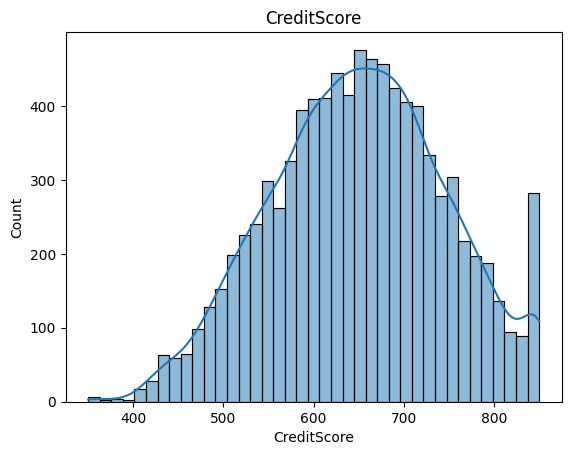

In [54]:
sns.histplot(data['CreditScore'], kde=True)  # kde=True会添加密度图层
plt.title('CreditScore')
plt.show()

In [43]:
data['Geography'].value_counts()

Geography
France     4495
Spain      2252
Germany    2249
Name: count, dtype: int64

In [44]:
data['Gender'].value_counts()

Gender
Male      4894
Female    4102
Name: count, dtype: int64

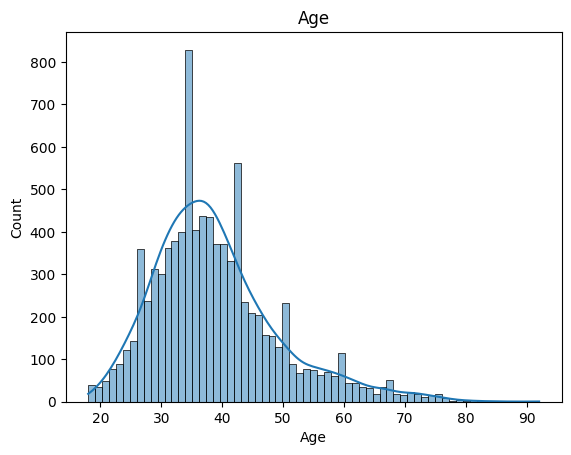

In [55]:
sns.histplot(data['Age'], kde=True)  # kde=True会添加密度图层
plt.title('Age')
plt.show()

In [57]:
data['Tenure'].value_counts()

Tenure
2     945
8     935
1     928
7     926
3     916
5     902
4     886
9     883
6     875
10    426
0     374
Name: count, dtype: int64

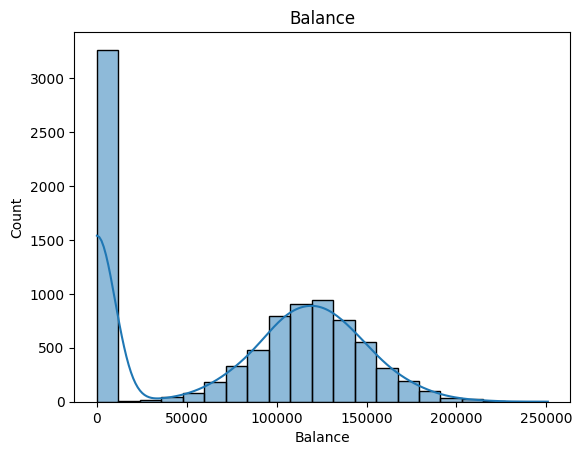

In [58]:
sns.histplot(data['Balance'], kde=True)  # kde=True会添加密度图层
plt.title('Balance')
plt.show()

In [47]:
data['NumOfProducts'].value_counts()

NumOfProducts
1    4564
2    4134
3     245
4      53
Name: count, dtype: int64

In [48]:
data['HasCrCard'].value_counts()

HasCrCard
1.0    6318
0.0    2678
Name: count, dtype: int64

In [49]:
data['IsActiveMember'].value_counts()

IsActiveMember
1.0    4618
0.0    4378
Name: count, dtype: int64

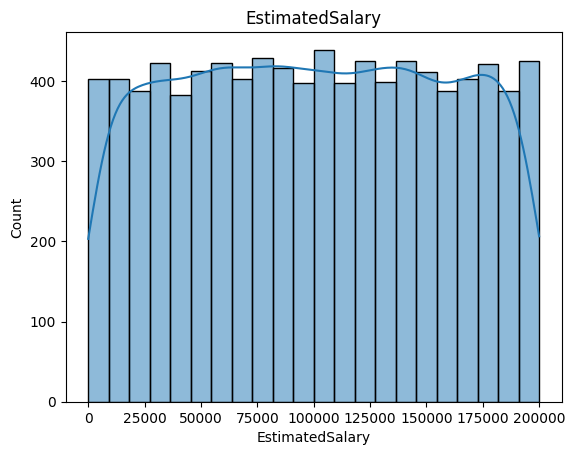

In [59]:
sns.histplot(data['EstimatedSalary'], kde=True)  # kde=True会添加密度图层
plt.title('EstimatedSalary')
plt.show()